In [25]:
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
import IPython.display as ipd
import soundfile as sf
import sounddevice as sd
import plotly.express as px

In [49]:
def soundwave(length_of_sample,frequency,sample_rate):
    #Define variables
    #sample rate F_s
    Fs = sample_rate 
    #sample period
    T = 1 /Fs
    #length of sampling (seconds)
    t = length_of_sample
    #resolution of signal
    N = Fs*t

    #Define signal information
    #note frequency
    f = frequency
    #angular frequency
    om = 2*np.pi*f 

    #time vector
    tv = np.arange(N) * T
    y = np.sin(om*tv)
    
    return tv, y

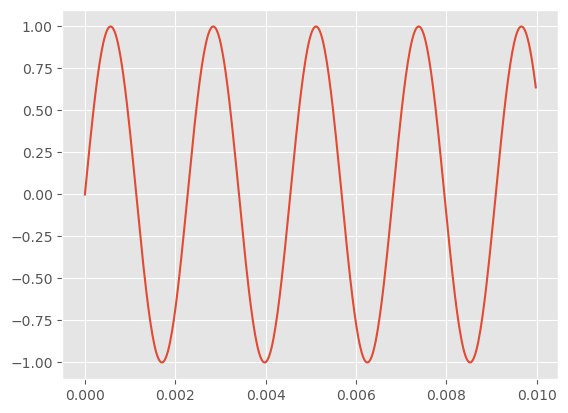

In [5]:
plt.style.use('ggplot')
freq = 440 #A_4 on a piano
tv,note = soundwave(0.01,freq,44100)
plt.plot(tv,note)
plt.show()

In [15]:
audio = note.astype(np.int16) 
tv,note = soundwave(5,440,44100)
sf.write(r'.\test.wav',note,44100,'PCM_24')
sd.play(note,44100)

In [64]:
freq = 440#A_4
sec = 0.01 #make it short and sweet :)
tv,note = soundwave(sec,freq,44100)
# plt.plot(tv,note)

#We want to show that with a sampling rate = 2*freq we can properly sample the waveform
tv1,note1 = soundwave(sec,freq,1.5*freq)
# plt.plot(tv1,note1,'b*')

tv2,note2 = soundwave(sec,freq,10*freq)
# plt.plot(tv2,note2,'g*')

# plt.show()

In [69]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=tv,
                         y=note,
                         name='Original Signal',
                         connectgaps=True))
fig.add_trace(go.Scatter(x=tv1,
                         y=note1,
                         name='1.5 * Frequency Sample',
                        line = dict(shape = "linear",color='rgb(10,240,12)',dash='dash'),
                        marker = dict(symbol="star-diamond",size=12)))
fig.add_trace(go.Scatter(x=tv2,
                         y=note2,
                         name='10 * Frequency Sample',
                        line = dict(shape = "linear",color='rgb(240,10,180)',dash='dot'),
                        marker = dict(symbol="star-diamond",size=12),
                        connectgaps = False))
fig.show()